In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from numpy import log
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\Asus\AppData\Local\Temp\ipykernel_20292\4167346307.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:

df = read_csv("usage.csv")
df.head()

,x
0,88
1,84
2,85
3,85
4,84


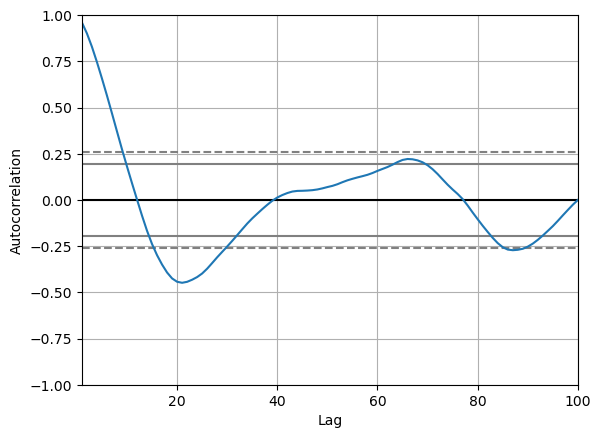

In [3]:
pd.plotting.autocorrelation_plot(df)
plt.show()

In [4]:
import statsmodels.api as sm

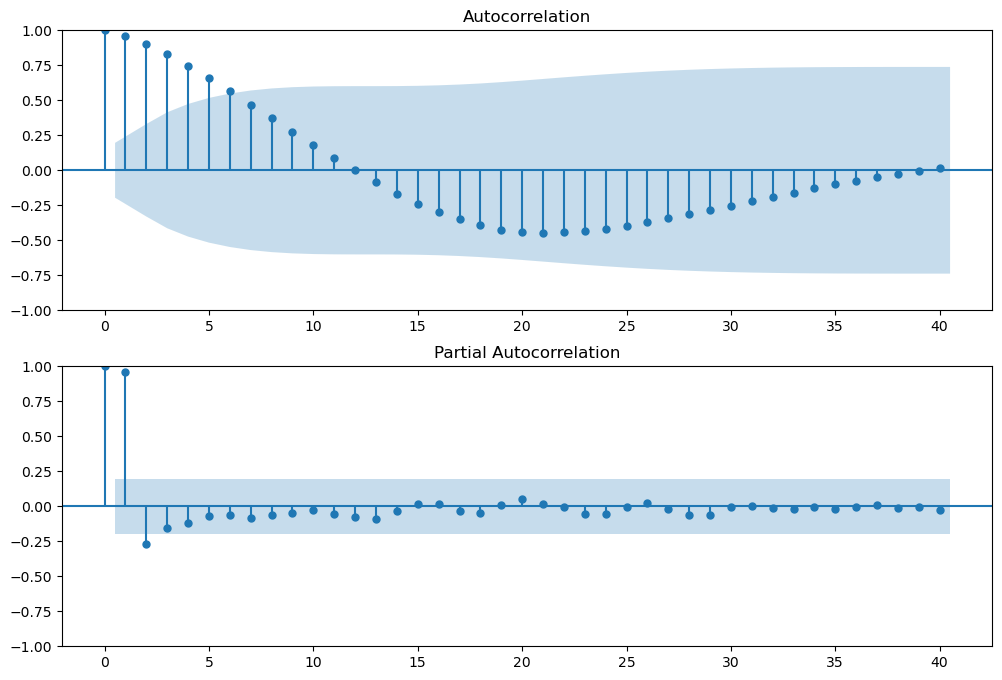

In [5]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df,lags=40,ax=ax2)

In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [7]:
autoarima_model = auto_arima(df, trace=True)
print(autoarima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=525.569, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1024.556, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1277.994, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=534.021, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=526.492, Time=0.12 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=529.901, Time=0.44 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=537.075, Time=0.30 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=564.487, Time=0.11 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=534.233, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=528.287, Time=0.10 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=526.414, Time=0.27 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=531.096, Time=0.22 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
Total 

In [8]:
size = int(len(df) * 0.85)
train = df[:size]
test = df[size:]

In [9]:
model = ARIMA(train, order=(1,2,3))  
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                   85
Model:                 ARIMA(1, 2, 3)   Log Likelihood                -215.018
Date:                Wed, 17 Jan 2024   AIC                            440.036
Time:                        20:17:40   BIC                            452.130
Sample:                             0   HQIC                           444.895
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2692      0.373     -0.722      0.470      -1.000       0.462
ma.L1          0.5005      0.361      1.388      0.165      -0.206       1.207
ma.L2         -0.3100      0.108     -2.857      0.0

In [10]:
# Get confidence intervals for the forecasts
forecast_steps = len(test) 
# forecast_results = fitted.get_forecast(steps=forecast_steps)
forecast = fitted.forecast(steps=forecast_steps) 
# conf_int = forecast_results.conf_int()  # Confidence intervals

In [11]:
# lower_series = pd.Series(conf_int['lower value'], index=test.index)
# upper_series = pd.Series(conf_int['upper value'], index=test.index)

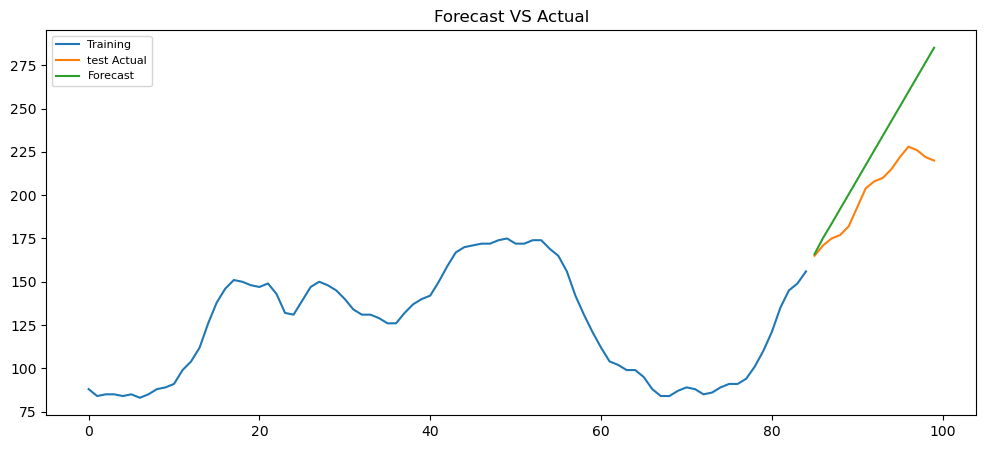

In [12]:
# Plot
plt.figure(figsize=(12,5))
plt.plot(train, label='Training')
plt.plot(test, label='test Actual')
plt.plot(forecast, label='Forecast')
# plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast VS Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Error calculation

In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [19]:
test.mean()

x    201.2
dtype: float64

In [14]:

rmse= sqrt(mean_squared_error(forecast,test))
rmse

30.177930507400013

# Future value prediction


In [15]:
future_df=fitted.predict(start=len(df), end=len(df)+20,dynamic=True)
# Value forecast for new 20 index

c:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


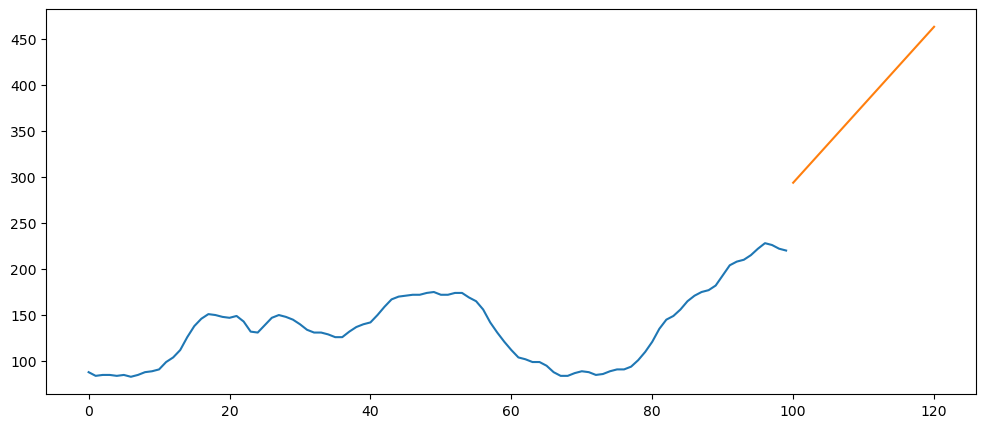

In [16]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df, label='original data')
plt.plot(future_df, label='Forecast')

In [17]:
# forecast_steps = len(test) 
# # forecast_results = fitted.get_forecast(steps=forecast_steps)
# forecast = fitted.forecast(steps=forecast_steps+20) 
# # conf_int = forecast_results.conf_int()

In [18]:
# plt.figure(figsize=(12,5), dpi=100)
# plt.plot(train, label='Training')
# plt.plot(test, label='Actual')
# plt.plot(forecast, label='Forecast')